<a href="https://colab.research.google.com/github/romeshb/Unsupervised_CredictCardUser_Clustering/blob/main/Customer_Clustering_CredictCardUsauge_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here I have trained a unsupervised Clustering Algorithm for clustering Credict card users according to their credict card usuage. Which can be further used for marketing purposes, and other use cases.

## the column desciption is as below:
*   1) CUSTID: Identification of Credit Card holder (Categorical)
*   2) BALANCE: Balance amount left in their account to make purchases
*   3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
*   4) PURCHASES: Amount of purchases made from account
*   5) ONEOFFPURCHASES: Maximum purchase amount done in one-go
*   6) INSTALLMENTSPURCHASES: Amount of purchase done in installment
*   7) CASHADVANCE: Cash in advance given by the user
*   8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1(1 = frequently purchased, 0 = not frequently purchased)
*   9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 =
frequently purchased, 0 = not frequently purchased)
*   10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being
done (1 = frequently done, 0 = not frequently done)
*  11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
*   12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
*   13) PURCHASESTRX: Number of purchase transactions made
*   14) CREDITLIMIT: Limit of Credit Card for user
*   15) PAYMENTS: Amount of Payment done by user
*   16) MINIMUM_PAYMENTS: Minimum amount of payments made by user
*   17) PRCFULLPAYMENT: Percent of full payment paid by user
*   18) TENURE: Tenure of credit card service for user

Loading the Dataset from CSV

---



In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cc = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Machine Learning Exam 1/Exam 2/credit_card.csv")

Understanding the Data With Descriptive Statistics. 

---



In [4]:
cc.head() # Peak at the dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cc.shape # Checking the Dimension of the Data

(8950, 18)

In [6]:
cc.info() # Checking the Datatypes of the Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
cc.describe() # Descriptive statistics to check the nature of the data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## primary analysis of several categorical features

In [8]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- As we can check there is only CUST_ID as categorical Column
- As this CUST_ID Column has unique values, we'll not use it for model building.
- But We can check the relationship between several other Numeric features, using correlation matrix.

In [9]:
cc = cc.drop(['CUST_ID'],axis=1) # We remove the CustId column from our dataset

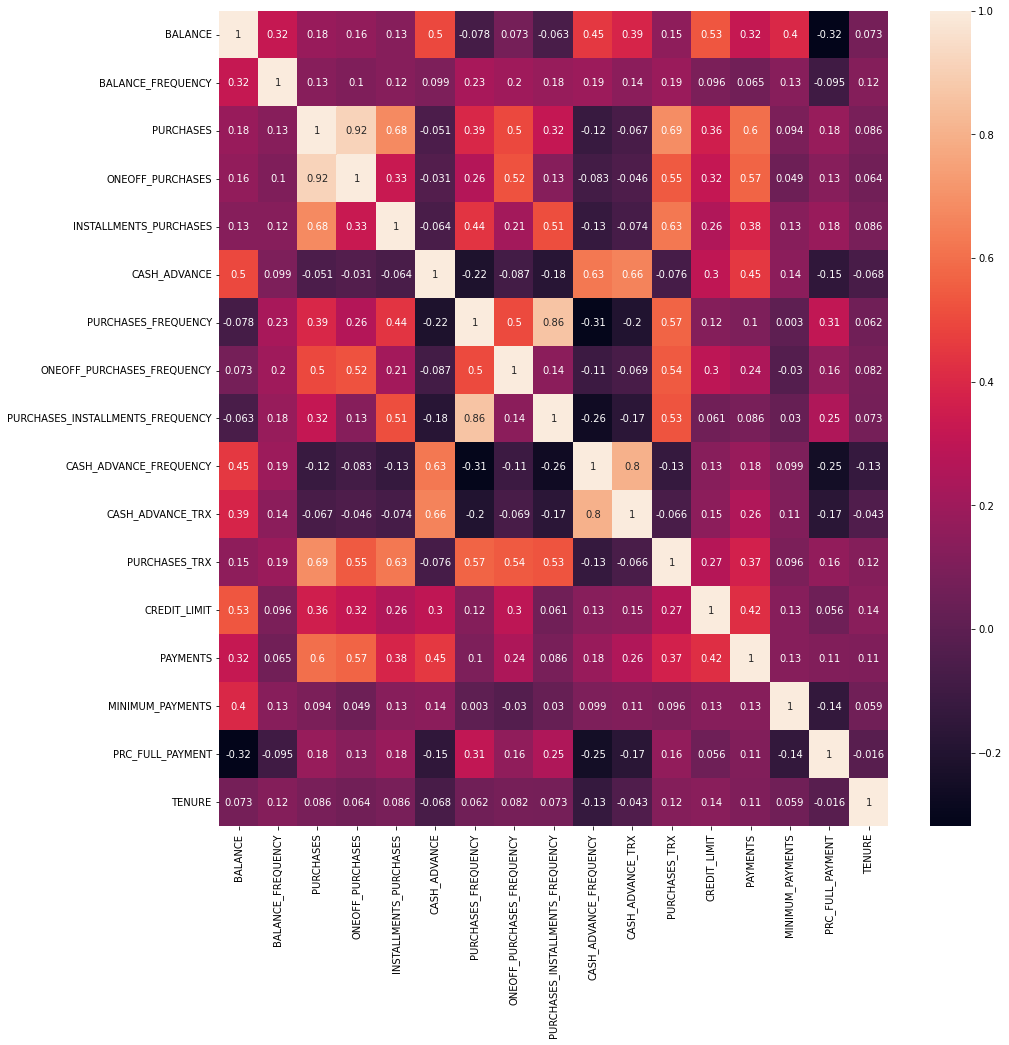

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(cc.corr(),annot=True);

### Missing Value Analysis

In [11]:
# Here we check if we have any missing values 
cc.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

* As we can check there are two columns with Nulls, CREDIT_LIMIT and MINIMUM_PAYMENTS with 1 and 313 nulls respectively.

* Generally if it's a Supervised Machine Learning Problem, we split the data into Train and Test before Handling the Nulls. As it may cause the problem of data leakage to the Test set.

* Here As it's a UnSupervised Machine Learning Problem, we can simply handle the Nulls.

In [12]:
#MINIMUM_PAYMENTS
cc.MINIMUM_PAYMENTS.describe() # WE check for what values should we impute instead of Nulls

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

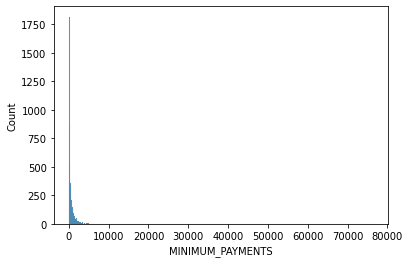

In [13]:
sns.histplot(cc.MINIMUM_PAYMENTS)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


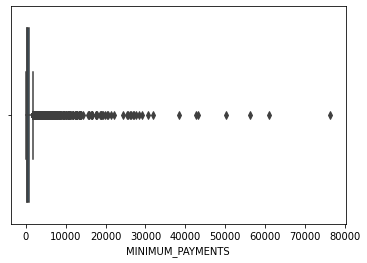

In [14]:
sns.boxplot(cc.MINIMUM_PAYMENTS);

In [15]:
# CREDIT_LIMIT
cc.CREDIT_LIMIT.describe() # WE check for what values should we impute instead of Nulls 

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

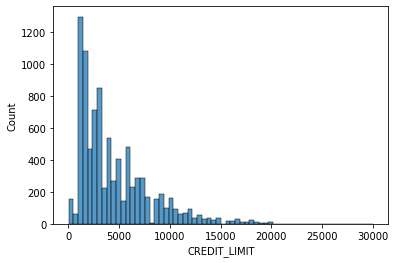

In [16]:
sns.histplot(cc.CREDIT_LIMIT)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


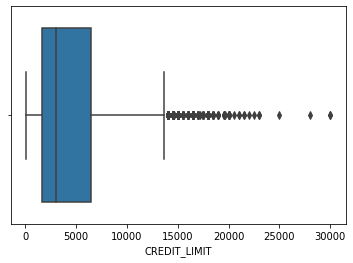

In [17]:
sns.boxplot(cc.CREDIT_LIMIT);

- As we can check from the above boxplots, there are some outliers.
- As we know Mean is prone to Outliers, we will not use Mean Values for Imputation, Instead We'll use Median- which is not prone to outliers.

In [18]:
cc.MINIMUM_PAYMENTS = cc.MINIMUM_PAYMENTS.fillna(cc.MINIMUM_PAYMENTS.median())
cc.CREDIT_LIMIT = cc.CREDIT_LIMIT.fillna(cc.CREDIT_LIMIT.median())

## Outlier Treatment using the Z-score method

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

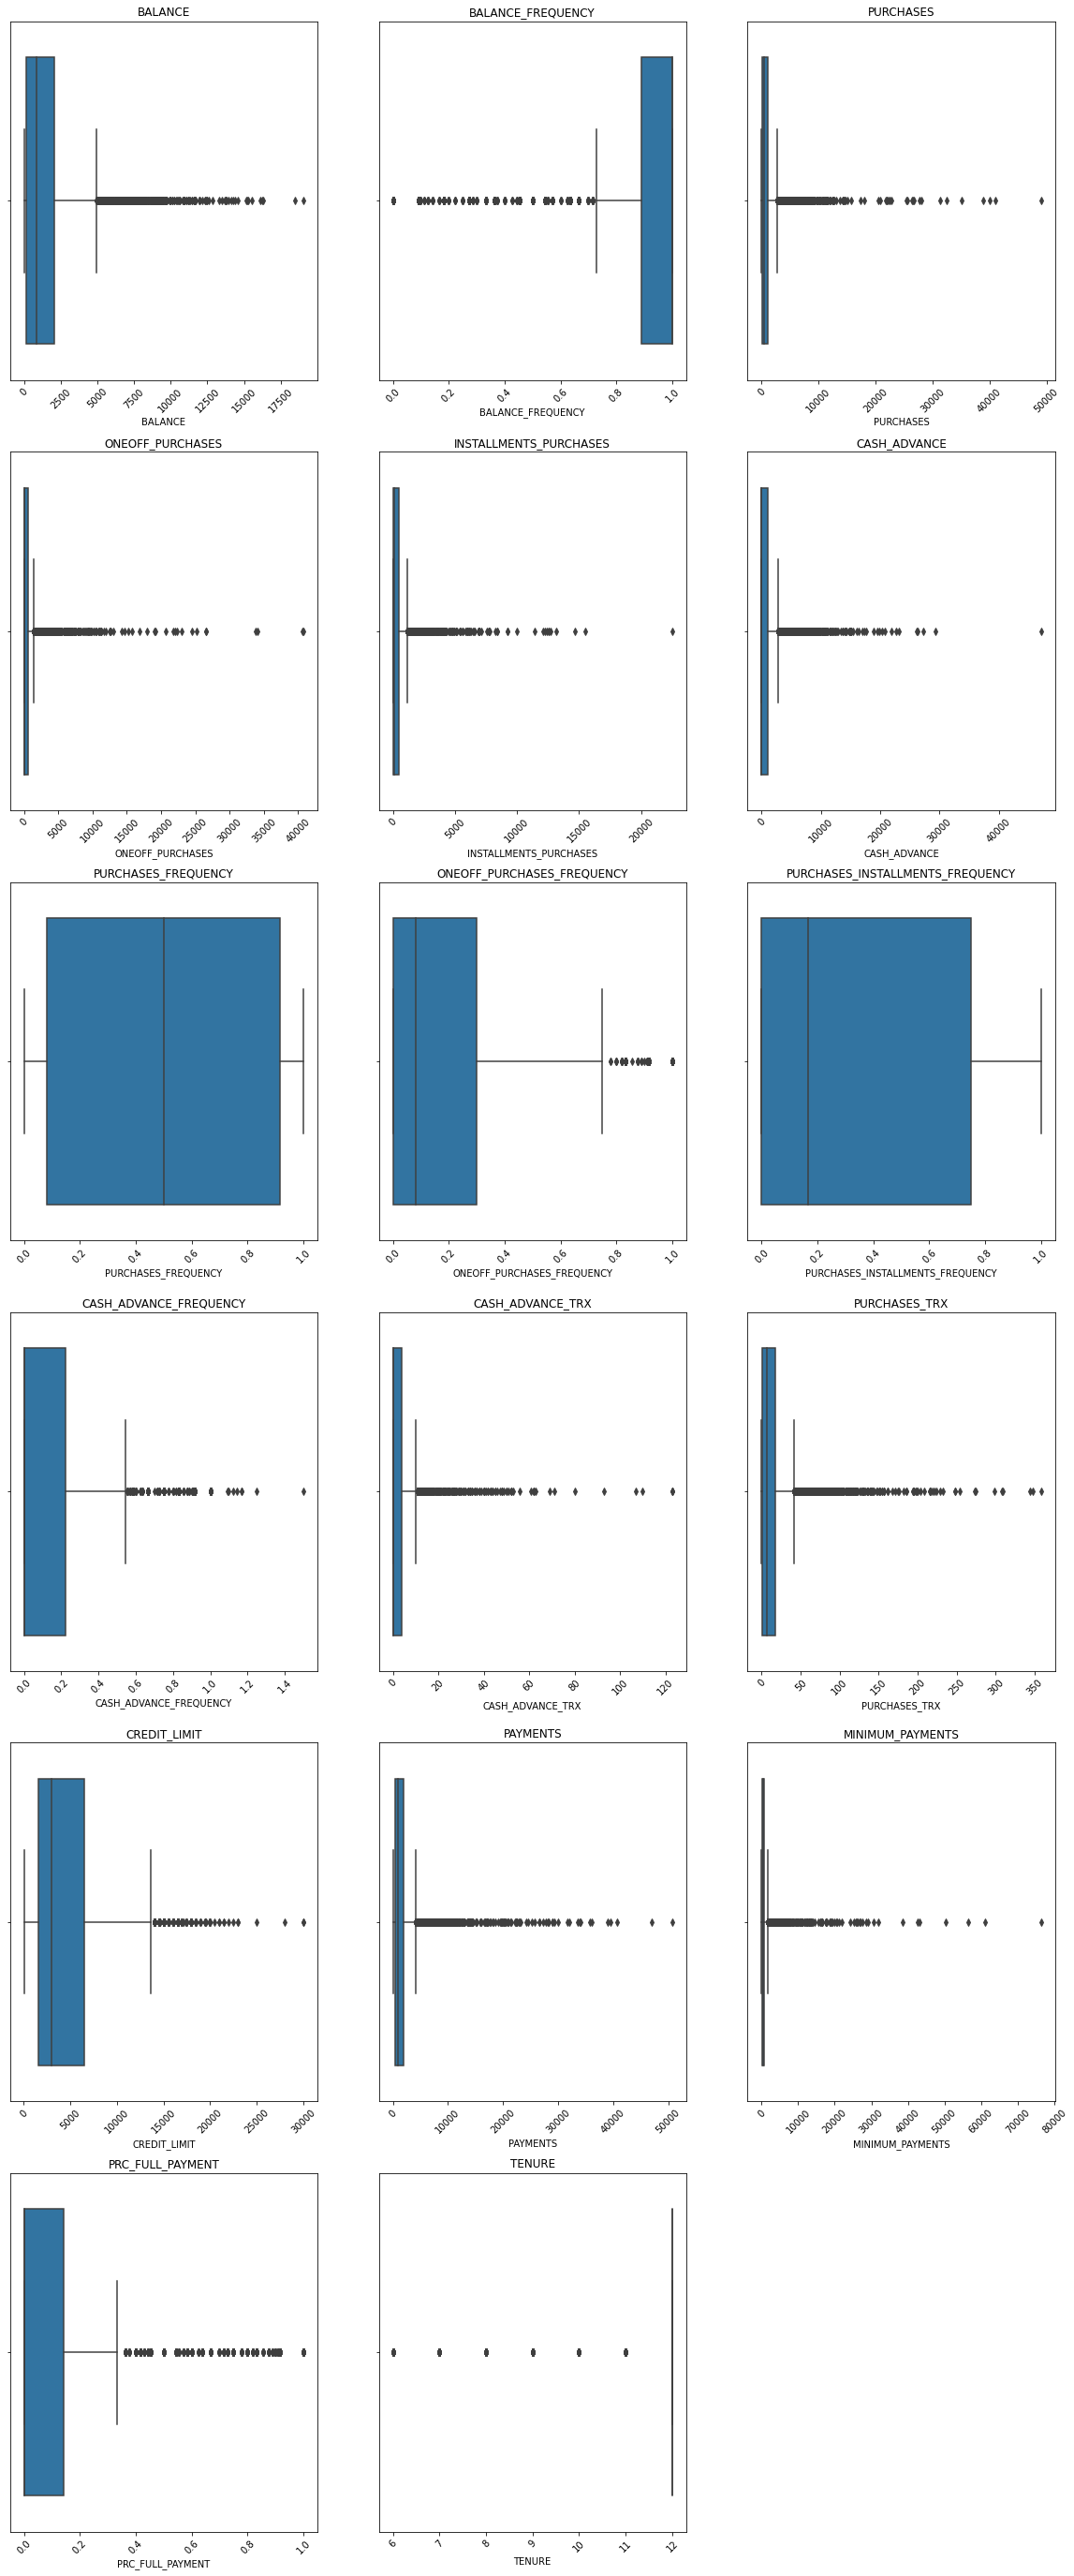

In [20]:
# We check the columns for outliers.
plt.figure(figsize=(20,100), facecolor='white')
plotnumber =1
for col in cc.columns:
    ax = plt.subplot(12,3,plotnumber, autoscale_on= True)
    plt.title(col)
    sns.boxplot(cc[col]);
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plotnumber+=1
plt.show()

- As we can check there are alot of outliers in PAYMENTS Columns, We'll handle the outliers using custom defined function,

In [21]:
def remove_outliers(df,col,k): # WHere df is dataframe, col is the name of the column, k is the SD.(for outlier SD = 3 is threshold) 
 mean=df[col].mean()
 sd=df[col].std()
 global df1
 final_list=[x for x in df[col] if (x>mean-k*sd)]
 final_list=[x for x in final_list if (x< mean+k*sd)]
 df1=df.loc[df[col].isin(final_list)];
 return df1


In [22]:
cc = remove_outliers(cc,'PAYMENTS',3)


## Deal with correlated variables

To the Multicollineartiy between Variables we

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [24]:
vif=pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(cc.values, i ) for i in range(cc.shape[1])]
vif['variables'] = cc.columns

In [25]:
vif

,vif values,variables
0,4.011057,BALANCE
1,18.055071,BALANCE_FREQUENCY
2,29429.977002,PURCHASES
3,14306.811514,ONEOFF_PURCHASES
4,7267.859544,INSTALLMENTS_PURCHASES
5,3.295496,CASH_ADVANCE
6,27.051685,PURCHASES_FREQUENCY
7,6.350974,ONEOFF_PURCHASES_FREQUENCY
8,18.404980,PURCHASES_INSTALLMENTS_FREQUENCY
9,5.216556,CASH_ADVANCE_FREQUENCY


In [26]:
# We drop the columns which have high Variance Inflation Fator,
# VIF measure signifies that the one or more columns can be droped.
cc_og = cc.copy() # we create a copy of dataframe with all the columns.
cc.drop(['ONEOFF_PURCHASES','PURCHASES'],axis=1,inplace=True) 

## Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [27]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
cc_sc = scaler.fit(cc)

In [30]:
scaled_cc = scaler.transform(cc)

In [31]:
pca = PCA()

In [32]:
pca.fit(scaled_cc)

PCA()

In [33]:
x_pca1 = pca.transform(scaled_cc)

In [34]:
cc.shape

(8791, 15)

In [35]:
x_pca1.shape

(8791, 15)

In [36]:
list(pca.explained_variance_ratio_)

[0.2513466795058776,
 0.2157181202033755,
 0.08483693360798884,
 0.080039298155273,
 0.06790734394710819,
 0.060361895864128476,
 0.05011968344417292,
 0.04801926887168473,
 0.04046807070458468,
 0.030895738756201805,
 0.021101399495862178,
 0.0181724707342358,
 0.01661753677456132,
 0.011497569720879411,
 0.0028979902140655886]

In [37]:
len(pca.explained_variance_ratio_)

15

In [38]:
pca_variance_ratio_list = list(pca.explained_variance_ratio_)
np.sum(pca_variance_ratio_list[0:12])

0.9689869032904936

As we can check around 96% of the variance explained by 12 Feautures.

## Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [39]:
from sklearn.cluster import KMeans

In [40]:
ssd = []
for k in (range(1,11)):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(cc)
    sc = kmeans_model.score(cc)
    ssd.append(sc)
print(ssd)

[-243530396808.63483, -155083640315.55646, -131175065922.17152, -106136477676.81854, -93425614989.49295, -84191146803.74257, -76122980746.49962, -68865507006.9067, -64000610956.89589, -59447105113.0533]


In [41]:
len(ssd)

10

In [42]:
ssd = np.round(np.abs(ssd))
ssd

array([2.43530397e+11, 1.55083640e+11, 1.31175066e+11, 1.06136478e+11,
       9.34256150e+10, 8.41911468e+10, 7.61229807e+10, 6.88655070e+10,
       6.40006110e+10, 5.94471051e+10])

In [43]:
x = list(range(1,11))
y = ssd 

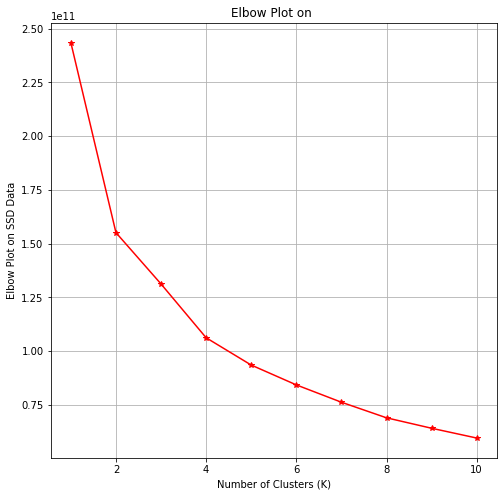

In [44]:
plt.figure(figsize= (8,8))
plt.plot(x,y,marker = '*',c='r',)
plt.title('Elbow Plot on ')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Elbow Plot on SSD Data', size = 10)
plt.grid()

Observing the plot with SSD on Y axis and Number of Clusters (K) on the X axis we can conculde that K = 4 can be used. As there is sudden decline till 4 and then the rate of decrease has slowed down.

In [45]:
# Let's build a model using K= 4

KM_best_K = KMeans(n_clusters=4)
KM_best_K.fit(cc)

KMeans(n_clusters=4)

In [46]:
cc["Cluster"]= list(KM_best_K.labels_)

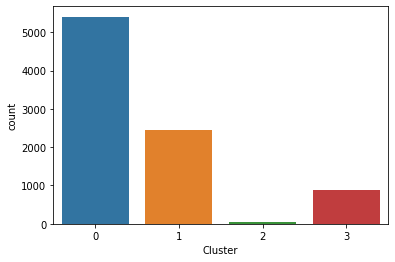

In [47]:
sns.countplot(cc["Cluster"]);

As we can check that Majority of the points are part of Cluster 1.

In [48]:
cc["Cluster"].value_counts() # We can check the count of each cluster 

0    5405
1    2456
3     874
2      56
Name: Cluster, dtype: int64

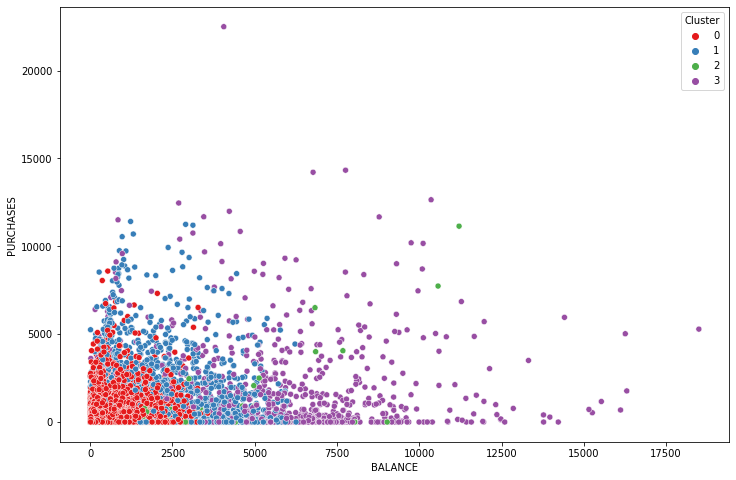

In [52]:
plt.figure(figsize= (12,8))
sns.set_palette('Set2')
sns.scatterplot(cc['BALANCE'],cc_og['PURCHASES'],hue=cc['Cluster'],palette='Set1')


*   label 0: Low balance and low purchases - Fine group
*   label 1: Low to moderate balance and high purchases - Carefree group
*   label 2: Moderate balance and moderate purchases - choosy group
*   label 3: Moderate to high balance and low purchases - Saving group**







--- End of Notebook ---